In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn import linear_model
import seaborn as sns
from collections import Counter

We all know police disproportionally stop and frisk black people, but I wanted to see the if there was a peak during BLM

In [2]:
df = pd.read_csv("sqf-2020.csv")

In [3]:
df

,STOP_ID,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,...,STOP_LOCATION_PRECINCT,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,1,1/1/20,1:12:00,2020,January,Wednesday,Based on Radio Run,APP,POM,19,...,19,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN
1,2,1/1/20,1:11:00,2020,January,Wednesday,Based on Radio Run,APP,POM,19,...,19,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN
2,3,1/1/20,1:11:00,2020,January,Wednesday,Based on Radio Run,APP,POM,19,...,19,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN
3,4,1/1/20,10:18:00,2020,January,Wednesday,Based on Radio Run,APP,POM,75,...,75,D,(null),LINDEN BLVD && SHEPHERD AVE,LINDEN BLVD,1018441,181412,11208,PBBN,BROOKLYN
4,5,1/1/20,8:45:00,2020,January,Wednesday,Based on Radio Run,APP,POM,78,...,78,B,(null),481 5 AVE,5 AVE,987763,182543,11215,PBBS,BROOKLYN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,9540,12/31/20,0:20:00,2020,December,Thursday,Based on Radio Run,APP,POM,72,...,72,D,(null),375 57 ST,57 ST,979566,173464,11220,PBBS,BROOKLYN
9540,9541,12/29/20,17:11:00,2020,December,Tuesday,Based on Radio Run,APP,CPT,78,...,71,B,(null),749 CROWN ST,CROWN ST,1002918,181721,11213,PBBS,BROOKLYN
9541,9542,12/12/20,1:45:00,2020,December,Saturday,Based on Self Initiated,APP,POM,75,...,73,C,(null),424 MOTHER GASTON BLVD,MOTHER GASTON BLVD,1010145,182898,11212,PBBN,BROOKLYN
9542,9543,12/25/20,15:45:00,2020,December,Friday,Based on Radio Run,APP,POM,73,...,73,A,(null),BROADWAY && HALSEY ST,BROADWAY,1007368,189362,(null),PBBN,BROOKLYN


<AxesSubplot:>

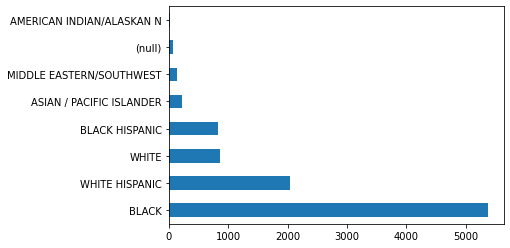

In [8]:
df['SUSPECT_RACE_DESCRIPTION'].value_counts().plot(kind ="barh", x="SUSPECT_RACE_DESCRIPTION")

In [98]:
df['MONTH2'].value_counts().sum()

9544

In [49]:
df['MONTH2'].value_counts().to_frame()

,MONTH2
March,1155
January,1142
February,1097
May,1069
April,938
November,721
October,693
December,634
September,628
June,553


In [50]:
#checking to see how many stop and frisks for black people happened in Jan - 671. that is 58.7% 
df[df['MONTH2'].str.contains("January")].groupby("SUSPECT_RACE_DESCRIPTION").describe()

STOP_ID                                          \
                            count        mean          std    min     25%   
SUSPECT_RACE_DESCRIPTION                                                    
(null)                       12.0  381.000000   305.340049   10.0  193.50   
AMERICAN INDIAN/ALASKAN N     2.0  927.000000   250.315801  750.0  838.50   
ASIAN / PACIFIC ISLANDER     29.0  688.551724   282.985687  210.0  408.00   
BLACK                       671.0  742.789866   995.540885    1.0  287.50   
BLACK HISPANIC               92.0  716.641304   923.043706   26.0  310.75   
MIDDLE EASTERN/SOUTHWEST     19.0  728.842105   321.019083  168.0  399.00   
WHITE                        76.0  812.157895  1245.038784    5.0  287.00   
WHITE HISPANIC              241.0  746.082988  1118.201481    3.0  217.00   

                                                  YEAR2          ...  \
                             50%     75%     max  count    mean  ...   
SUSPECT_RACE_DESCRIPTION                                         ...   
(null)                     315.0   565.0  1097.0   12.0  2020.0  ...   
AMERICAN INDIAN/ALASKAN N  927.0  1015.5  1104.0    2.0  2020.0  ...   
ASIAN / PACIFIC ISLANDER   724.0   916.0  1313.0   29.0  2020.0  ...   
BLACK                      575.0   868.5  9537.0  671.0  2020.0  ...   
BLACK HISPANIC             565.5   827.5  6228.0   92.0  2020.0  ...   
MIDDLE EASTERN/SOUTHWEST   798.0   947.5  1176.0   19.0  2020.0  ...   
WHITE                      567.0   916.0  8360.0   76.0  2020.0  ...   
WHITE HISPANIC             537.0   837.0  9505.0  241.0  2020.0  ...   

                          STOP_LOCATION_X            STOP_LOCATION_Y  \
                                      75%        max           count   
SUSPECT_RACE_DESCRIPTION                                               
(null)                         1015601.25  1023363.0            12.0   
AMERICAN INDIAN/ALASKAN N      1007183.00  1014574.0             2.0   
ASIAN / PACIFIC ISLANDER       1022520.00  1060194.0            29.0   
BLACK                          1015844.00  1060256.0           671.0   
BLACK HISPANIC                 1015945.75  1041390.0            92.0   
MIDDLE EASTERN/SOUTHWEST       1013529.50  1025472.0            19.0   
WHITE                          1011713.00  1046653.0            76.0   
WHITE HISPANIC                 1020728.00  1053677.0           241.0   

                                                                             \
                                    mean           std       min        25%   
SUSPECT_RACE_DESCRIPTION                                                      
(null)                     222571.833333  26902.940025  171523.0  213234.00   
AMERICAN INDIAN/ALASKAN N  169855.000000  17526.348678  157462.0  163658.50   
ASIAN / PACIFIC ISLANDER   189543.896552  19877.919993  148537.0  170551.00   
BLACK                      205475.704918  30482.132663  143436.0  183412.00   
BLACK HISPANIC             225036.173913  28713.799130  144861.0  204580.25   
MIDDLE EASTERN/SOUTHWEST   197947.947368  31429.137577  160517.0  165864.00   
WHITE                      194284.631579  35660.728581  126598.0  166214.00   
WHITE HISPANIC             212901.684647  28941.520698  124904.0  193471.00   

                                                         
                                50%       75%       max  
SUSPECT_RACE_DESCRIPTION                                 
(null)                     221615.5  242632.5  258549.0  
AMERICAN INDIAN/ALASKAN N  169855.0  176051.5  182248.0  
ASIAN / PACIFIC ISLANDER   189974.0  208314.0  221229.0  
BLACK                      198790.0  234279.5  263533.0  
BLACK HISPANIC             236155.0  246880.0  260551.0  
MIDDLE EASTERN/SOUTHWEST   209839.0  213312.0  258549.0  
WHITE                      195026.0  221234.0  266218.0  
WHITE HISPANIC             213647.0  235395.0  260388.0  

[8 rows x 72 columns]

In [51]:
#checking to see how many stop and frisks for black people happened in Feb - 650. that is 59.2% 
df[df['MONTH2'].str.contains("February")].groupby("SUSPECT_RACE_DESCRIPTION").describe()

STOP_ID                                             \
                            count         mean          std     min      25%   
SUSPECT_RACE_DESCRIPTION                                                       
(null)                       10.0  1864.300000   474.924099  1061.0  1626.50   
AMERICAN INDIAN/ALASKAN N     2.0  1805.000000   247.487373  1630.0  1717.50   
ASIAN / PACIFIC ISLANDER     18.0  1661.833333   287.440684  1137.0  1451.00   
BLACK                       650.0  1745.513846   723.391088   923.0  1329.25   
BLACK HISPANIC              104.0  1806.336538   874.048016   939.0  1339.75   
MIDDLE EASTERN/SOUTHWEST     12.0  1903.583333  1174.054007  1417.0  1454.50   
WHITE                        93.0  1740.021505   540.565143  1005.0  1411.00   
WHITE HISPANIC              208.0  1769.605769   908.154394   936.0  1282.50   

                                                    YEAR2          ...  \
                              50%      75%     max  count    mean  ...   
SUSPECT_RACE_DESCRIPTION                                           ...   
(null)                     1894.5  2121.50  2573.0   10.0  2020.0  ...   
AMERICAN INDIAN/ALASKAN N  1805.0  1892.50  1980.0    2.0  2020.0  ...   
ASIAN / PACIFIC ISLANDER   1641.0  1826.50  2205.0   18.0  2020.0  ...   
BLACK                      1627.5  1922.75  6591.0  650.0  2020.0  ...   
BLACK HISPANIC             1662.5  1908.00  6231.0  104.0  2020.0  ...   
MIDDLE EASTERN/SOUTHWEST   1588.0  1701.25  5610.0   12.0  2020.0  ...   
WHITE                      1727.0  1951.00  5104.0   93.0  2020.0  ...   
WHITE HISPANIC             1598.0  1890.25  7467.0  208.0  2020.0  ...   

                          STOP_LOCATION_X            STOP_LOCATION_Y  \
                                      75%        max           count   
SUSPECT_RACE_DESCRIPTION                                               
(null)                         1020255.25  1035468.0            10.0   
AMERICAN INDIAN/ALASKAN N      1029572.25  1043558.0             2.0   
ASIAN / PACIFIC ISLANDER       1034421.00  1058610.0            18.0   
BLACK                          1012686.25  1059823.0           650.0   
BLACK HISPANIC                 1013603.00  1053976.0           104.0   
MIDDLE EASTERN/SOUTHWEST       1037424.25  1048907.0            12.0   
WHITE                          1001036.00  1053677.0            93.0   
WHITE HISPANIC                 1018637.75  1053976.0           208.0   

                                                                             \
                                    mean           std       min        25%   
SUSPECT_RACE_DESCRIPTION                                                      
(null)                     204346.900000  39397.558366  164411.0  173118.50   
AMERICAN INDIAN/ALASKAN N  201862.500000   4428.609771  198731.0  200296.75   
ASIAN / PACIFIC ISLANDER   195950.833333  23166.366580  167773.0  181117.75   
BLACK                      208469.969231  29794.430532  138373.0  184679.00   
BLACK HISPANIC             226254.586538  29300.516823  140486.0  209008.75   
MIDDLE EASTERN/SOUTHWEST   210061.166667  23279.377193  162420.0  199832.50   
WHITE                      190183.311828  27648.333344  134907.0  164785.00   
WHITE HISPANIC             213667.375000  27902.644656  154464.0  194172.75   

                                                          
                                50%        75%       max  
SUSPECT_RACE_DESCRIPTION                                  
(null)                     181715.5  236467.75  262703.0  
AMERICAN INDIAN/ALASKAN N  201862.5  203428.25  204994.0  
ASIAN / PACIFIC ISLANDER   189368.0  205207.50  242266.0  
BLACK                      206985.5  234756.00  265473.0  
BLACK HISPANIC             236937.5  249482.00  265132.0  
MIDDLE EASTERN/SOUTHWEST   213655.5  216358.00  246787.0  
WHITE                      194365.0  213887.00  253049.0  
WHITE HISPANIC             213074.5  238280.25  261411.0  

[8 rows x 72 colu

In [52]:
#checking to see how many stop and frisks for black people happened in March - 657. that is 56.8% 
df[df['MONTH2'].str.contains("March")].groupby("SUSPECT_RACE_DESCRIPTION").describe()

STOP_ID                                            \
                            count         mean         std     min      25%   
SUSPECT_RACE_DESCRIPTION                                                      
(null)                        7.0  2326.571429  266.130204  1998.0  2227.00   
AMERICAN INDIAN/ALASKAN N     2.0  2254.000000  127.279221  2164.0  2209.00   
ASIAN / PACIFIC ISLANDER     23.0  2633.347826  372.733711  2039.0  2299.50   
BLACK                       657.0  2806.322679  633.304296  1972.0  2400.00   
BLACK HISPANIC              107.0  2840.635514  680.658053  2038.0  2396.00   
MIDDLE EASTERN/SOUTHWEST     14.0  2740.357143  647.328309  2089.0  2436.50   
WHITE                       100.0  2803.150000  602.688629  1979.0  2389.75   
WHITE HISPANIC              245.0  2883.689796  789.152093  1971.0  2418.00   

                                                    YEAR2          ...  \
                              50%      75%     max  count    mean  ...   
SUSPECT_RACE_DESCRIPTION                                           ...   
(null)                     2273.0  2354.50  2852.0    7.0  2020.0  ...   
AMERICAN INDIAN/ALASKAN N  2254.0  2299.00  2344.0    2.0  2020.0  ...   
ASIAN / PACIFIC ISLANDER   2738.0  2866.00  3483.0   23.0  2020.0  ...   
BLACK                      2716.0  3036.00  6581.0  657.0  2020.0  ...   
BLACK HISPANIC             2752.0  3037.50  6074.0  107.0  2020.0  ...   
MIDDLE EASTERN/SOUTHWEST   2614.0  2804.50  4711.0   14.0  2020.0  ...   
WHITE                      2781.0  3085.75  5086.0  100.0  2020.0  ...   
WHITE HISPANIC             2757.0  3020.00  6671.0  245.0  2020.0  ...   

                          STOP_LOCATION_X            STOP_LOCATION_Y  \
                                      75%        max           count   
SUSPECT_RACE_DESCRIPTION                                               
(null)                         1013763.00  1016919.0             7.0   
AMERICAN INDIAN/ALASKAN N      1019317.75  1025419.0             2.0   
ASIAN / PACIFIC ISLANDER       1032353.00  1042104.0            23.0   
BLACK                          1015708.00  1057096.0           657.0   
BLACK HISPANIC                 1015491.50  1041748.0           107.0   
MIDDLE EASTERN/SOUTHWEST       1021119.25  1036500.0            14.0   
WHITE                          1000671.75  1049670.0           100.0   
WHITE HISPANIC                 1016540.00  1057395.0           245.0   

                                                                             \
                                    mean           std       min        25%   
SUSPECT_RACE_DESCRIPTION                                                      
(null)                     215021.857143  25016.979477  195874.0  195874.00   
AMERICAN INDIAN/ALASKAN N  190657.500000  16726.610909  178830.0  184743.75   
ASIAN / PACIFIC ISLANDER   213097.478261  21844.404786  179317.0  196567.50   
BLACK                      205502.756469  29540.827955  136908.0  183371.00   
BLACK HISPANIC             221256.168224  28326.601110  149400.0  197044.00   
MIDDLE EASTERN/SOUTHWEST   202953.428571  23489.770326  165613.0  190470.75   
WHITE                      193340.050000  32636.082572  137466.0  163699.00   
WHITE HISPANIC             209971.567347  30066.254080  125836.0  190981.00   

                                                          
                                50%        75%       max  
SUSPECT_RACE_DESCRIPTION                                  
(null)                     196211.0  232834.00  255652.0  
AMERICAN INDIAN/ALASKAN N  190657.5  196571.25  202485.0  
ASIAN / PACIFIC ISLANDER   210863.0  222954.50  259100.0  
BLACK                      200202.0  231288.00  264214.0  
BLACK HISPANIC             228162.0  246512.50  259064.0  
MIDDLE EASTERN/SOUTHWEST   203044.0  219164.00  244954.0  
WHITE                      196617.5  215738.50  261815.0  
WHITE HISPANIC             210569.0  236977.00  262264.0  

[8 rows x 72 columns]

In [36]:
#checking to see how many stop and frisks for black people happened in April - 502. that is 53.5% 
df[df['MONTH2'].str.contains("April")].groupby("SUSPECT_RACE_DESCRIPTION").describe()

STOP_ID                                            \
                            count         mean         std     min      25%   
SUSPECT_RACE_DESCRIPTION                                                      
(null)                        4.0  4127.750000  523.930259  3380.0  4016.00   
AMERICAN INDIAN/ALASKAN N     1.0  3384.000000         NaN  3384.0  3384.00   
ASIAN / PACIFIC ISLANDER     20.0  3873.800000  804.596375  3233.0  3397.50   
BLACK                       502.0  3838.161355  569.206178  3133.0  3491.25   
BLACK HISPANIC               91.0  3825.802198  674.639166  3110.0  3480.50   
MIDDLE EASTERN/SOUTHWEST      8.0  3501.625000  132.889791  3244.0  3484.25   
WHITE                        93.0  3811.279570  494.696424  3160.0  3560.00   
WHITE HISPANIC              219.0  3738.977169  538.706363  3167.0  3455.00   

                                                    YEAR2          ...  \
                              50%      75%     max  count    mean  ...   
SUSPECT_RACE_DESCRIPTION                                           ...   
(null)                     4265.0  4376.75  4601.0    4.0  2020.0  ...   
AMERICAN INDIAN/ALASKAN N  3384.0  3384.00  3384.0    1.0  2020.0  ...   
ASIAN / PACIFIC ISLANDER   3736.5  3924.25  6991.0   20.0  2020.0  ...   
BLACK                      3784.0  4021.75  8837.0  502.0  2020.0  ...   
BLACK HISPANIC             3736.0  3975.50  8856.0   91.0  2020.0  ...   
MIDDLE EASTERN/SOUTHWEST   3552.5  3565.25  3640.0    8.0  2020.0  ...   
WHITE                      3789.0  3972.00  7025.0   93.0  2020.0  ...   
WHITE HISPANIC             3684.0  3884.50  8597.0  219.0  2020.0  ...   

                          STOP_LOCATION_X            STOP_LOCATION_Y  \
                                      75%        max           count   
SUSPECT_RACE_DESCRIPTION                                               
(null)                         1016756.00  1017773.0             4.0   
AMERICAN INDIAN/ALASKAN N      1025419.00  1025419.0             1.0   
ASIAN / PACIFIC ISLANDER       1034494.75  1052175.0            20.0   
BLACK                          1015948.50  1060150.0           502.0   
BLACK HISPANIC                 1013239.50  1051821.0            91.0   
MIDDLE EASTERN/SOUTHWEST       1010657.50  1016488.0             8.0   
WHITE                          1000377.00  1044871.0            93.0   
WHITE HISPANIC                 1018604.00  1052231.0           219.0   

                                                                             \
                                    mean           std       min        25%   
SUSPECT_RACE_DESCRIPTION                                                      
(null)                     221200.000000  35336.997241  190451.0  191065.25   
AMERICAN INDIAN/ALASKAN N  202485.000000           NaN  202485.0  202485.00   
ASIAN / PACIFIC ISLANDER   190835.100000  23244.506753  153040.0  171074.25   
BLACK                      207382.073705  29386.811050  137546.0  185164.00   
BLACK HISPANIC             221463.846154  29974.670265  137546.0  197809.50   
MIDDLE EASTERN/SOUTHWEST   186754.000000  27212.586263  155638.0  159903.00   
WHITE                      192747.430108  31510.414443  130103.0  164005.00   
WHITE HISPANIC             206613.785388  28078.856061  129386.0  186585.00   

                                                          
                                50%        75%       max  
SUSPECT_RACE_DESCRIPTION                                  
(null)                     218580.0  248714.75  257189.0  
AMERICAN INDIAN/ALASKAN N  202485.0  202485.00  202485.0  
ASIAN / PACIFIC ISLANDER   190683.5  214068.25  224853.0  
BLACK                      202601.5  232264.25  268363.0  
BLACK HISPANIC             230483.0  246114.50  260724.0  
MIDDLE EASTERN/SOUTHWEST   190855.0  211084.50  214434.0  
WHITE                      200177.0  214221.00  260687.0  
WHITE HISPANIC             210805.0  225557.50  260004.0  

[8 rows x 72 columns]

In [37]:
#checking to see how many stop and frisks for black people happened in may - 633. that is 59.2% 
df[df['MONTH2'].str.contains("May")].groupby("SUSPECT_RACE_DESCRIPTION").describe()

STOP_ID                                            \
                            count         mean         std     min      25%   
SUSPECT_RACE_DESCRIPTION                                                      
(null)                        4.0  4875.000000  463.670860  4256.0  4754.00   
AMERICAN INDIAN/ALASKAN N     4.0  4776.000000  513.111424  4087.0  4650.25   
ASIAN / PACIFIC ISLANDER     30.0  4727.233333  365.087206  4232.0  4362.25   
BLACK                       633.0  4798.371248  551.901096  4069.0  4435.00   
BLACK HISPANIC               63.0  5106.825397  958.877024  4161.0  4631.00   
MIDDLE EASTERN/SOUTHWEST     25.0  4828.600000  327.281097  4258.0  4629.00   
WHITE                        83.0  4742.060241  509.022194  4127.0  4339.50   
WHITE HISPANIC              227.0  4821.026432  548.659669  4054.0  4446.00   

                                                    YEAR2          ...  \
                              50%      75%     max  count    mean  ...   
SUSPECT_RACE_DESCRIPTION                                           ...   
(null)                     4932.0  5053.00  5380.0    4.0  2020.0  ...   
AMERICAN INDIAN/ALASKAN N  4844.0  4969.75  5329.0    4.0  2020.0  ...   
ASIAN / PACIFIC ISLANDER   4695.5  5103.25  5420.0   30.0  2020.0  ...   
BLACK                      4751.0  5043.00  9447.0  633.0  2020.0  ...   
BLACK HISPANIC             4917.0  5117.00  9486.0   63.0  2020.0  ...   
MIDDLE EASTERN/SOUTHWEST   4916.0  5062.00  5419.0   25.0  2020.0  ...   
WHITE                      4686.0  4977.50  7026.0   83.0  2020.0  ...   
WHITE HISPANIC             4735.0  5055.50  7205.0  227.0  2020.0  ...   

                          STOP_LOCATION_X            STOP_LOCATION_Y  \
                                      75%        max           count   
SUSPECT_RACE_DESCRIPTION                                               
(null)                          998737.00  1000630.0             4.0   
AMERICAN INDIAN/ALASKAN N       998736.00  1004940.0             4.0   
ASIAN / PACIFIC ISLANDER       1031668.75  1051757.0            30.0   
BLACK                          1012906.00  1060102.0           633.0   
BLACK HISPANIC                 1015140.00  1055006.0            63.0   
MIDDLE EASTERN/SOUTHWEST       1001965.00  1055086.0            25.0   
WHITE                          1015080.00  1057635.0            83.0   
WHITE HISPANIC                 1015047.50  1054763.0           227.0   

                                                                             \
                                    mean           std       min        25%   
SUSPECT_RACE_DESCRIPTION                                                      
(null)                     186313.000000  30374.119762  156392.0  170221.25   
AMERICAN INDIAN/ALASKAN N  178184.500000  21776.920941  157081.0  164775.25   
ASIAN / PACIFIC ISLANDER   190765.500000  18917.615935  159689.0  173365.75   
BLACK                      205881.696682  31517.493188      40.0  183612.00   
BLACK HISPANIC             220562.984127  29203.548884  148786.0  202384.50   
MIDDLE EASTERN/SOUTHWEST   187988.400000  23165.748574  155575.0  172740.00   
WHITE                      193700.734940  30672.562673  129602.0  162419.50   
WHITE HISPANIC             213267.911894  28597.016097  131412.0  195491.00   

                                                          
                                50%        75%       max  
SUSPECT_RACE_DESCRIPTION                                  
(null)                     180413.5  196505.25  228033.0  
AMERICAN INDIAN/ALASKAN N  174140.5  187549.75  207376.0  
ASIAN / PACIFIC ISLANDER   189511.0  207809.75  220108.0  
BLACK                      201256.0  234564.00  268662.0  
BLACK HISPANIC             219608.0  247309.50  261508.0  
MIDDLE EASTERN/SOUTHWEST   187990.0  199879.00  248765.0  
WHITE                      202431.0  214599.00  260904.0  
WHITE HISPANIC             212274.0  236036.00  262411.0  

[8 rows x 72 columns]

In [38]:
#checking to see how many stop and frisks for black people happened in june - 292. while numnbers for stop and 
#frisks dropped in half that is still 52.8% 
df[df['MONTH2'].str.contains("June")].groupby("SUSPECT_RACE_DESCRIPTION").describe()

STOP_ID                                            \
                            count         mean         std     min      25%   
SUSPECT_RACE_DESCRIPTION                                                      
(null)                        3.0  5708.333333  240.042357  5446.0  5604.00   
AMERICAN INDIAN/ALASKAN N     2.0  5607.500000   84.145707  5548.0  5577.75   
ASIAN / PACIFIC ISLANDER     11.0  5529.909091  134.363280  5337.0  5457.50   
BLACK                       292.0  5607.585616  374.767542  5137.0  5381.00   
BLACK HISPANIC               52.0  5488.403846  173.752050  5169.0  5370.75   
MIDDLE EASTERN/SOUTHWEST     10.0  5633.900000  186.734779  5281.0  5639.25   
WHITE                        66.0  5534.727273  513.161829  5128.0  5322.00   
WHITE HISPANIC              117.0  5553.333333  221.776099  5143.0  5404.00   

                                                    YEAR2          ...  \
                              50%      75%     max  count    mean  ...   
SUSPECT_RACE_DESCRIPTION                                           ...   
(null)                     5762.0  5839.50  5917.0    3.0  2020.0  ...   
AMERICAN INDIAN/ALASKAN N  5607.5  5637.25  5667.0    2.0  2020.0  ...   
ASIAN / PACIFIC ISLANDER   5513.0  5627.00  5772.0   11.0  2020.0  ...   
BLACK                      5586.5  5742.25  9328.0  292.0  2020.0  ...   
BLACK HISPANIC             5480.0  5636.00  5885.0   52.0  2020.0  ...   
MIDDLE EASTERN/SOUTHWEST   5694.5  5725.75  5804.0   10.0  2020.0  ...   
WHITE                      5494.0  5606.00  9352.0   66.0  2020.0  ...   
WHITE HISPANIC             5564.0  5712.00  6428.0  117.0  2020.0  ...   

                          STOP_LOCATION_X            STOP_LOCATION_Y  \
                                      75%        max           count   
SUSPECT_RACE_DESCRIPTION                                               
(null)                         1011320.50  1020429.0             3.0   
AMERICAN INDIAN/ALASKAN N      1015560.50  1017452.0             2.0   
ASIAN / PACIFIC ISLANDER       1031717.50  1046955.0            11.0   
BLACK                          1019974.25  1061048.0           292.0   
BLACK HISPANIC                 1012163.25  1055444.0            52.0   
MIDDLE EASTERN/SOUTHWEST        997069.50  1008323.0            10.0   
WHITE                          1000267.50  1052622.0            66.0   
WHITE HISPANIC                 1017541.00  1050381.0           117.0   

                                                                             \
                                    mean           std       min        25%   
SUSPECT_RACE_DESCRIPTION                                                      
(null)                     203083.333333   9533.885951  193214.0  198504.00   
AMERICAN INDIAN/ALASKAN N  242416.500000  11232.391219  234474.0  238445.25   
ASIAN / PACIFIC ISLANDER   205607.545455  17319.141499  167000.0  200621.50   
BLACK                      202457.226027  29513.605552  123664.0  182406.50   
BLACK HISPANIC             219312.942308  28310.490547  156245.0  200324.00   
MIDDLE EASTERN/SOUTHWEST   188354.500000  23572.502918  152650.0  170172.00   
WHITE                      184326.651515  39256.938375      40.0  158107.50   
WHITE HISPANIC             213851.042735  30942.313904  148651.0  190907.00   

                                                          
                                50%        75%       max  
SUSPECT_RACE_DESCRIPTION                                  
(null)                     203794.0  208018.00  212242.0  
AMERICAN INDIAN/ALASKAN N  242416.5  246387.75  250359.0  
ASIAN / PACIFIC ISLANDER   209416.0  217221.50  228047.0  
BLACK                      200948.5  229869.50  265337.0  
BLACK HISPANIC             217436.0  246563.00  259418.0  
MIDDLE EASTERN/SOUTHWEST   188429.0  200972.00  225522.0  
WHITE                      195675.0  205072.75  254304.0  
WHITE HISPANIC             216045.0  237703.00  261943.0  

[8 rows x 72 columns]

In [39]:
#checking to see how many stop and frisks for black people happened in july - 206 - 53%
df[df['MONTH2'].str.contains("July")].groupby("SUSPECT_RACE_DESCRIPTION").describe()

STOP_ID                                            \
                            count         mean         std     min      25%   
SUSPECT_RACE_DESCRIPTION                                                      
(null)                        4.0  6053.250000  269.571728  5832.0  5837.25   
AMERICAN INDIAN/ALASKAN N     2.0  6085.000000  154.149278  5976.0  6030.50   
ASIAN / PACIFIC ISLANDER     11.0  5984.545455   87.605209  5879.0  5916.00   
BLACK                       206.0  6062.854369  160.435226  5783.0  5950.00   
BLACK HISPANIC               34.0  6213.382353  500.310511  5831.0  5983.25   
MIDDLE EASTERN/SOUTHWEST      9.0  6192.000000  335.323351  5825.0  6071.00   
WHITE                        36.0  6055.138889  172.721436  5778.0  5937.75   
WHITE HISPANIC               86.0  6049.488372  192.783313  5782.0  5931.25   

                                                    YEAR2          ...  \
                              50%      75%     max  count    mean  ...   
SUSPECT_RACE_DESCRIPTION                                           ...   
(null)                     5995.5  6211.50  6390.0    4.0  2020.0  ...   
AMERICAN INDIAN/ALASKAN N  6085.0  6139.50  6194.0    2.0  2020.0  ...   
ASIAN / PACIFIC ISLANDER   5985.0  6040.00  6127.0   11.0  2020.0  ...   
BLACK                      6051.5  6169.00  6652.0  206.0  2020.0  ...   
BLACK HISPANIC             6074.0  6148.25  8488.0   34.0  2020.0  ...   
MIDDLE EASTERN/SOUTHWEST   6147.0  6180.00  7035.0    9.0  2020.0  ...   
WHITE                      6031.0  6167.25  6651.0   36.0  2020.0  ...   
WHITE HISPANIC             6026.5  6135.00  7209.0   86.0  2020.0  ...   

                          STOP_LOCATION_X            STOP_LOCATION_Y  \
                                      75%        max           count   
SUSPECT_RACE_DESCRIPTION                                               
(null)                         1015172.25  1019751.0             4.0   
AMERICAN INDIAN/ALASKAN N      1002229.00  1007223.0             2.0   
ASIAN / PACIFIC ISLANDER       1038558.00  1056543.0            11.0   
BLACK                          1015459.25  1059147.0           206.0   
BLACK HISPANIC                 1013622.00  1039051.0            34.0   
MIDDLE EASTERN/SOUTHWEST       1005103.00  1007587.0             9.0   
WHITE                          1000385.25  1056543.0            36.0   
WHITE HISPANIC                 1011327.25  1056454.0            86.0   

                                                                             \
                                    mean           std       min        25%   
SUSPECT_RACE_DESCRIPTION                                                      
(null)                     220874.000000  41245.609851  164775.0  202471.50   
AMERICAN INDIAN/ALASKAN N  197684.000000   5055.813485  194109.0  195896.50   
ASIAN / PACIFIC ISLANDER   195977.818182  22123.890878  158732.0  187372.00   
BLACK                      200981.800971  31088.758858  142546.0  178578.75   
BLACK HISPANIC             225391.264706  33334.015375  151289.0  215577.75   
MIDDLE EASTERN/SOUTHWEST   196749.333333  40291.275557  152082.0  167376.00   
WHITE                      191840.666667  27887.191352  146516.0  167485.25   
WHITE HISPANIC             204578.616279  33312.609475  148972.0  176265.00   

                                                          
                                50%        75%       max  
SUSPECT_RACE_DESCRIPTION                                  
(null)                     232698.0  251100.50  253325.0  
AMERICAN INDIAN/ALASKAN N  197684.0  199471.50  201259.0  
ASIAN / PACIFIC ISLANDER   200559.0  209587.50  221391.0  
BLACK                      194412.0  229912.00  264311.0  
BLACK HISPANIC             240090.0  248362.75  260331.0  
MIDDLE EASTERN/SOUTHWEST   170106.0  233641.00  245405.0  
WHITE                      196668.5  217458.50  253686.0  
WHITE HISPANIC             209271.0  232420.00  260331.0  

[8 rows x 72 columns]

In [40]:
#checking to see how many stop and frisks for black people happened in august - 305 - 57.9%
df[df['MONTH2'].str.contains("August")].groupby("SUSPECT_RACE_DESCRIPTION").describe()

STOP_ID                                           \
                           count         mean         std     min     25%   
SUSPECT_RACE_DESCRIPTION                                                    
(null)                       5.0  6537.800000   75.426786  6467.0  6473.0   
ASIAN / PACIFIC ISLANDER     5.0  6627.000000  333.950595  6236.0  6572.0   
BLACK                      305.0  6623.472131  365.270988  6207.0  6427.0   
BLACK HISPANIC              48.0  6590.583333  370.381450  6218.0  6373.0   
MIDDLE EASTERN/SOUTHWEST     5.0  6583.400000  169.182741  6309.0  6563.0   
WHITE                       50.0  6577.780000  478.315893  6243.0  6369.0   
WHITE HISPANIC             108.0  6596.824074  336.104841  6216.0  6407.5   

                                                  YEAR2          ...  \
                             50%     75%     max  count    mean  ...   
SUSPECT_RACE_DESCRIPTION                                         ...   
(null)                    6529.0  6571.0  6649.0    5.0  2020.0  ...   
ASIAN / PACIFIC ISLANDER  6582.0  6583.0  7162.0    5.0  2020.0  ...   
BLACK                     6559.0  6713.0  9527.0  305.0  2020.0  ...   
BLACK HISPANIC            6563.0  6673.5  8392.0   48.0  2020.0  ...   
MIDDLE EASTERN/SOUTHWEST  6601.0  6717.0  6727.0    5.0  2020.0  ...   
WHITE                     6458.5  6633.5  9478.0   50.0  2020.0  ...   
WHITE HISPANIC            6566.5  6669.5  9091.0  108.0  2020.0  ...   

                         STOP_LOCATION_X            STOP_LOCATION_Y  \
                                     75%        max           count   
SUSPECT_RACE_DESCRIPTION                                              
(null)                        1012304.00  1027534.0             5.0   
ASIAN / PACIFIC ISLANDER      1001690.00  1041748.0             5.0   
BLACK                         1011811.00  1059268.0           305.0   
BLACK HISPANIC                1010186.75  1032047.0            48.0   
MIDDLE EASTERN/SOUTHWEST       997658.00  1049332.0             5.0   
WHITE                         1012064.25  1045094.0            50.0   
WHITE HISPANIC                1012819.25  1048564.0           108.0   

                                                                            \
                                   mean           std       min        25%   
SUSPECT_RACE_DESCRIPTION                                                     
(null)                    219792.600000  34945.849665  172197.0  201599.00   
ASIAN / PACIFIC ISLANDER  180779.200000  23057.371028  160880.0  160880.00   
BLACK                     204429.416393  29157.215898  133290.0  183680.00   
BLACK HISPANIC            224598.354167  24726.269095  155558.0  211487.25   
MIDDLE EASTERN/SOUTHWEST  186912.600000  21999.909234  158089.0  172570.00   
WHITE                     190867.960000  30145.643624  132299.0  164901.75   
WHITE HISPANIC            215057.129630  28516.681038  127174.0  195005.25   

                                                         
                               50%        75%       max  
SUSPECT_RACE_DESCRIPTION                                 
(null)                    217985.0  253057.00  254125.0  
ASIAN / PACIFIC ISLANDER  172673.0  196938.00  212525.0  
BLACK                     200915.0  229481.00  262277.0  
BLACK HISPANIC            232078.0  240572.25  256100.0  
MIDDLE EASTERN/SOUTHWEST  193554.0  195471.00  214879.0  
WHITE                     195874.0  214415.25  255237.0  
WHITE HISPANIC            222228.5  236467.25  260139.0  

[7 rows x 72 columns]

In [41]:
#checking to see how many stop and frisks for black people happened in September - 368 - 58.5%
df[df['MONTH2'].str.contains("September")].groupby("SUSPECT_RACE_DESCRIPTION").describe()

STOP_ID                                           \
                           count         mean         std     min     25%   
SUSPECT_RACE_DESCRIPTION                                                    
(null)                       6.0  7030.500000  267.670506  6718.0  6809.0   
ASIAN / PACIFIC ISLANDER    15.0  7086.000000  358.499054  6750.0  6860.0   
BLACK                      368.0  7158.355978  290.011436  6706.0  6960.5   
BLACK HISPANIC              57.0  7252.877193  528.770679  6770.0  6953.0   
MIDDLE EASTERN/SOUTHWEST     3.0  7044.666667  294.737737  6874.0  6874.5   
WHITE                       46.0  7130.347826  321.090518  6761.0  6932.0   
WHITE HISPANIC             133.0  7164.308271  346.436692  6752.0  6945.0   

                                                   YEAR2          ...  \
                             50%      75%     max  count    mean  ...   
SUSPECT_RACE_DESCRIPTION                                          ...   
(null)                    7033.5  7255.75  7334.0    6.0  2020.0  ...   
ASIAN / PACIFIC ISLANDER  6916.0  7237.50  8152.0   15.0  2020.0  ...   
BLACK                     7149.5  7306.25  8871.0  368.0  2020.0  ...   
BLACK HISPANIC            7170.0  7358.00  9524.0   57.0  2020.0  ...   
MIDDLE EASTERN/SOUTHWEST  6875.0  7130.00  7385.0    3.0  2020.0  ...   
WHITE                     7103.5  7250.75  8741.0   46.0  2020.0  ...   
WHITE HISPANIC            7107.0  7284.00  9098.0  133.0  2020.0  ...   

                         STOP_LOCATION_X            STOP_LOCATION_Y  \
                                     75%        max           count   
SUSPECT_RACE_DESCRIPTION                                              
(null)                         1003159.0  1011020.0             6.0   
ASIAN / PACIFIC ISLANDER       1032572.5  1063070.0            15.0   
BLACK                          1013271.0  1059294.0           368.0   
BLACK HISPANIC                 1014529.0  1026567.0            57.0   
MIDDLE EASTERN/SOUTHWEST        969503.5   994422.0             3.0   
WHITE                          1003681.0  1059740.0            46.0   
WHITE HISPANIC                 1015480.0  1052360.0           133.0   

                                                                           \
                                   mean           std       min       25%   
SUSPECT_RACE_DESCRIPTION                                                    
(null)                    226036.833333  15155.718609  210932.0  216327.5   
ASIAN / PACIFIC ISLANDER  194278.533333  16180.486249  165835.0  186483.5   
BLACK                     206774.168478  32092.191480  139588.0  183614.5   
BLACK HISPANIC            225582.947368  27741.109019  166907.0  199662.0   
MIDDLE EASTERN/SOUTHWEST  146488.000000  14658.345984  138025.0  138025.0   
WHITE                     198534.739130  22539.478719  136932.0  188966.0   
WHITE HISPANIC            206243.736842  30160.599611  152886.0  182053.0   

                                                        
                               50%       75%       max  
SUSPECT_RACE_DESCRIPTION                                
(null)                    224147.0  228321.5  253561.0  
ASIAN / PACIFIC ISLANDER  197385.0  210043.0  215945.0  
BLACK                     201353.0  236290.0  267867.0  
BLACK HISPANIC            238348.0  249141.0  260487.0  
MIDDLE EASTERN/SOUTHWEST  138025.0  150719.5  163414.0  
WHITE                     201245.0  214463.5  246715.0  
WHITE HISPANIC            203976.0  233786.0  265080.0  

[7 rows x 72 columns]

In [42]:
#checking to see how many stop and frisks for black people happened in October - 359 - 51.8%
df[df['MONTH2'].str.contains("October")].groupby("SUSPECT_RACE_DESCRIPTION").describe()

STOP_ID                                            \
                            count         mean         std     min      25%   
SUSPECT_RACE_DESCRIPTION                                                      
(null)                        6.0  8012.333333  397.987269  7524.0  7788.75   
AMERICAN INDIAN/ALASKAN N     1.0  7942.000000         NaN  7942.0  7942.00   
ASIAN / PACIFIC ISLANDER     12.0  7798.250000  216.837235  7500.0  7665.00   
BLACK                       359.0  7810.359331  309.545426  7366.0  7601.50   
BLACK HISPANIC               70.0  7854.942857  336.919243  7377.0  7628.75   
MIDDLE EASTERN/SOUTHWEST      6.0  7842.500000  225.867882  7418.0  7841.50   
WHITE                        71.0  7854.478873  312.217454  7397.0  7674.00   
WHITE HISPANIC              168.0  7814.791667  300.252625  7348.0  7595.25   

                                                    YEAR2          ...  \
                              50%      75%     max  count    mean  ...   
SUSPECT_RACE_DESCRIPTION                                           ...   
(null)                     7950.5  8177.50  8661.0    6.0  2020.0  ...   
AMERICAN INDIAN/ALASKAN N  7942.0  7942.00  7942.0    1.0  2020.0  ...   
ASIAN / PACIFIC ISLANDER   7719.5  8014.50  8120.0   12.0  2020.0  ...   
BLACK                      7789.0  7962.50  9529.0  359.0  2020.0  ...   
BLACK HISPANIC             7832.0  7968.75  9515.0   70.0  2020.0  ...   
MIDDLE EASTERN/SOUTHWEST   7879.5  7945.25  8082.0    6.0  2020.0  ...   
WHITE                      7828.0  7972.50  9457.0   71.0  2020.0  ...   
WHITE HISPANIC             7789.0  7990.25  8681.0  168.0  2020.0  ...   

                          STOP_LOCATION_X            STOP_LOCATION_Y  \
                                      75%        max           count   
SUSPECT_RACE_DESCRIPTION                                               
(null)                         1010725.25  1049674.0             6.0   
AMERICAN INDIAN/ALASKAN N       986157.00   986157.0             1.0   
ASIAN / PACIFIC ISLANDER       1036417.25  1058257.0            12.0   
BLACK                          1014769.50  1060197.0           359.0   
BLACK HISPANIC                 1011989.75  1048244.0            70.0   
MIDDLE EASTERN/SOUTHWEST       1024494.75  1038317.0             6.0   
WHITE                          1019441.50  1051698.0            71.0   
WHITE HISPANIC                 1016468.50  1041814.0           168.0   

                                                                             \
                                    mean           std       min        25%   
SUSPECT_RACE_DESCRIPTION                                                      
(null)                     199563.166667  38505.673537  156340.0  164328.00   
AMERICAN INDIAN/ALASKAN N  156292.000000           NaN  156292.0  156292.00   
ASIAN / PACIFIC ISLANDER   204267.250000  17114.897552  186055.0  190902.00   
BLACK                      209674.467967  30191.571459  141204.0  185283.50   
BLACK HISPANIC             229046.600000  25286.166110  157525.0  214387.75   
MIDDLE EASTERN/SOUTHWEST   190179.333333  41290.520334  152886.0  156290.25   
WHITE                      191141.676056  32775.913634  125836.0  164903.50   
WHITE HISPANIC             214469.827381  28617.589505  129742.0  196214.50   

                                                          
                                50%        75%       max  
SUSPECT_RACE_DESCRIPTION                                  
(null)                     202778.5  233212.25  240614.0  
AMERICAN INDIAN/ALASKAN N  156292.0  156292.00  156292.0  
ASIAN / PACIFIC ISLANDER   197674.0  217469.00  236440.0  
BLACK                      210000.0  237069.00  269277.0  
BLACK HISPANIC             238117.0  250459.00  260890.0  
MIDDLE EASTERN/SOUTHWEST   176435.0  227842.75  240766.0  
WHITE                      198389.0  215192.00  253499.0  
WHITE HISPANIC             213443.5  238493.25  262003.0  

[8 rows x 72 columns]

In [46]:
#checking to see how many stop and frisks for black people happened in Nov - 394 - 54.6%
df[df['MONTH2'].str.contains("November")].groupby("SUSPECT_RACE_DESCRIPTION").describe()

STOP_ID                                            \
                            count         mean         std     min      25%   
SUSPECT_RACE_DESCRIPTION                                                      
(null)                        8.0  8716.000000  253.518103  8354.0  8516.75   
AMERICAN INDIAN/ALASKAN N     1.0  8917.000000         NaN  8917.0  8917.00   
ASIAN / PACIFIC ISLANDER     21.0  8397.285714  321.464639  8026.0  8078.00   
BLACK                       394.0  8534.192893  261.114334  8031.0  8319.25   
BLACK HISPANIC               63.0  8514.380952  231.318551  8023.0  8338.50   
MIDDLE EASTERN/SOUTHWEST      7.0  8478.000000  205.789537  8127.0  8387.50   
WHITE                        67.0  8459.253731  233.732257  8042.0  8253.00   
WHITE HISPANIC              160.0  8469.731250  258.389003  8027.0  8275.75   

                                                    YEAR2          ...  \
                              50%      75%     max  count    mean  ...   
SUSPECT_RACE_DESCRIPTION                                           ...   
(null)                     8788.5  8792.25  9181.0    8.0  2020.0  ...   
AMERICAN INDIAN/ALASKAN N  8917.0  8917.00  8917.0    1.0  2020.0  ...   
ASIAN / PACIFIC ISLANDER   8413.0  8512.00  9152.0   21.0  2020.0  ...   
BLACK                      8532.5  8718.50  9533.0  394.0  2020.0  ...   
BLACK HISPANIC             8547.0  8678.50  8950.0   63.0  2020.0  ...   
MIDDLE EASTERN/SOUTHWEST   8509.0  8626.50  8682.0    7.0  2020.0  ...   
WHITE                      8461.0  8678.00  8890.0   67.0  2020.0  ...   
WHITE HISPANIC             8432.5  8666.25  9411.0  160.0  2020.0  ...   

                          STOP_LOCATION_X            STOP_LOCATION_Y  \
                                      75%        max           count   
SUSPECT_RACE_DESCRIPTION                                               
(null)                         1004685.00  1043566.0             8.0   
AMERICAN INDIAN/ALASKAN N      1046367.00  1046367.0             1.0   
ASIAN / PACIFIC ISLANDER       1025127.00  1054547.0            21.0   
BLACK                          1015209.00  1056025.0           394.0   
BLACK HISPANIC                 1014992.00  1023868.0            63.0   
MIDDLE EASTERN/SOUTHWEST       1021446.50  1031102.0             7.0   
WHITE                          1017335.50  1063551.0            67.0   
WHITE HISPANIC                 1015773.75  1051958.0           160.0   

                                                                             \
                                    mean           std       min        25%   
SUSPECT_RACE_DESCRIPTION                                                      
(null)                     222570.875000  22321.290198  180294.0  218680.75   
AMERICAN INDIAN/ALASKAN N  186986.000000           NaN  186986.0  186986.00   
ASIAN / PACIFIC ISLANDER   204592.761905  17538.127411  160986.0  207055.00   
BLACK                      206023.076142  31278.651810      40.0  183371.00   
BLACK HISPANIC             222121.190476  33438.435678  137752.0  204632.00   
MIDDLE EASTERN/SOUTHWEST   187822.285714  24497.585995  160203.0  165621.50   
WHITE                      199736.462687  36189.670014      40.0  189789.00   
WHITE HISPANIC             214836.806250  28706.754714  132006.0  193817.50   

                                                          
                                50%        75%       max  
SUSPECT_RACE_DESCRIPTION                                  
(null)                     230258.5  234189.50  244477.0  
AMERICAN INDIAN/ALASKAN N  186986.0  186986.00  186986.0  
ASIAN / PACIFIC ISLANDER   208863.0  210801.00  239520.0  
BLACK                      203333.0  233239.75  263790.0  
BLACK HISPANIC             238403.0  247974.50  262985.0  
MIDDLE EASTERN/SOUTHWEST   186927.0  208895.00  218593.0  
WHITE                      205714.0  222243.50  249532.0  
WHITE HISPANIC             215168.5  241411.75  261168.0  

[8 rows x 72 columns]

In [47]:
#checking to see how many stop and frisks for black people happened in December - 330 - 56.8% 
df[df['MONTH2'].str.contains("December")].groupby("SUSPECT_RACE_DESCRIPTION").describe()

STOP_ID                                            \
                           count         mean         std     min      25%   
SUSPECT_RACE_DESCRIPTION                                                     
(null)                       5.0  9277.000000  197.568975  8938.0  9265.00   
ASIAN / PACIFIC ISLANDER    24.0  9190.166667  226.179741  8819.0  9059.75   
BLACK                      330.0  9204.642424  198.019862  8796.0  9052.25   
BLACK HISPANIC              48.0  9199.729167  219.602808  8823.0  9011.00   
MIDDLE EASTERN/SOUTHWEST    14.0  9129.642857  181.429201  8822.0  9026.75   
WHITE                       75.0  9142.720000  221.537048  8802.0  8932.50   
WHITE HISPANIC             138.0  9196.253623  192.419366  8799.0  9041.50   

                                                   YEAR2          ...  \
                             50%      75%     max  count    mean  ...   
SUSPECT_RACE_DESCRIPTION                                          ...   
(null)                    9393.0  9394.00  9395.0    5.0  2020.0  ...   
ASIAN / PACIFIC ISLANDER  9102.5  9403.75  9532.0   24.0  2020.0  ...   
BLACK                     9208.0  9373.25  9544.0  330.0  2020.0  ...   
BLACK HISPANIC            9210.0  9399.25  9520.0   48.0  2020.0  ...   
MIDDLE EASTERN/SOUTHWEST  9106.5  9146.75  9528.0   14.0  2020.0  ...   
WHITE                     9086.0  9361.50  9530.0   75.0  2020.0  ...   
WHITE HISPANIC            9214.5  9349.75  9540.0  138.0  2020.0  ...   

                         STOP_LOCATION_X            STOP_LOCATION_Y  \
                                     75%        max           count   
SUSPECT_RACE_DESCRIPTION                                              
(null)                        1012003.00  1013279.0             5.0   
ASIAN / PACIFIC ISLANDER      1039094.00  1051914.0            24.0   
BLACK                         1012922.50  1057221.0           330.0   
BLACK HISPANIC                1011600.00  1032198.0            48.0   
MIDDLE EASTERN/SOUTHWEST      1015033.75  1044636.0            14.0   
WHITE                         1008606.50  1063000.0            75.0   
WHITE HISPANIC                1013942.00  1054991.0           138.0   

                                                                            \
                                   mean           std       min        25%   
SUSPECT_RACE_DESCRIPTION                                                     
(null)                    226381.400000  24281.245083  183056.0  236149.00   
ASIAN / PACIFIC ISLANDER  196435.208333  24151.089623  156425.0  172069.50   
BLACK                     205626.487879  29501.362264  147958.0  182983.00   
BLACK HISPANIC            216540.041667  33615.914657  149596.0  194213.00   
MIDDLE EASTERN/SOUTHWEST  213850.142857  15438.821870  176285.0  211218.75   
WHITE                     193914.560000  31551.025276  127011.0  171625.50   
WHITE HISPANIC            220711.007246  30151.673007  148502.0  195477.25   

                                                         
                               50%        75%       max  
SUSPECT_RACE_DESCRIPTION                                 
(null)                    236248.0  236248.00  240206.0  
ASIAN / PACIFIC ISLANDER  210457.0  210753.75  221062.0  
BLACK                     197673.5  232244.50  264804.0  
BLACK HISPANIC            220229.0  246145.25  262955.0  
MIDDLE EASTERN/SOUTHWEST  213090.0  222414.25  237033.0  
WHITE                     202485.0  213931.00  259130.0  
WHITE HISPANIC            218145.0  250384.50  265500.0  

[7 rows x 72 columns]

In [ ]:
#month to month percent - 58.7% , 59.2% , 56.8%, 53.5%, 59.2%, 52.8%, 53%, 57.9%, 58.5%, 51.8%, 54.6%, 52%

In [72]:
#what is the most common suspected crime description
df.groupby('SUSPECTED_CRIME_DESCRIPTION')["SUSPECT_RACE_DESCRIPTION"].describe()

,count,unique,top,freq
SUSPECTED_CRIME_DESCRIPTION,,,,
ASSAULT,1064,8,BLACK,634
AUTO STRIPPIG,39,5,WHITE HISPANIC,16
BURGLARY,1008,8,BLACK,440
CPSP,57,6,BLACK,28
CPW,2552,8,BLACK,1640
CRIMINAL MISCHIEF,227,6,BLACK,112
CRIMINAL POSSESSION OF CONTROLLED SUBSTANCE,32,4,BLACK,15
CRIMINAL POSSESSION OF FORGED INSTRUMENT,10,2,BLACK,8
CRIMINAL POSSESSION OF MARIHUANA,32,4,BLACK,16


In [73]:
#looking at Black people specifically.
df[df["SUSPECT_RACE_DESCRIPTION"]=="BLACK"].groupby('SUSPECTED_CRIME_DESCRIPTION')['SUSPECT_RACE_DESCRIPTION'].value_counts()

SUSPECTED_CRIME_DESCRIPTION                  SUSPECT_RACE_DESCRIPTION
ASSAULT                                      BLACK                        634
AUTO STRIPPIG                                BLACK                          8
BURGLARY                                     BLACK                        440
CPSP                                         BLACK                         28
CPW                                          BLACK                       1640
CRIMINAL MISCHIEF                            BLACK                        112
CRIMINAL POSSESSION OF CONTROLLED SUBSTANCE  BLACK                         15
CRIMINAL POSSESSION OF FORGED INSTRUMENT     BLACK                          8
CRIMINAL POSSESSION OF MARIHUANA             BLACK                         16
CRIMINAL SALE OF CONTROLLED SUBSTANCE        BLACK                         10
CRIMINAL SALE OF MARIHUANA                   BLACK                          6
CRIMINAL TRESPASS                            BLACK                      

In [74]:
#comparing a white person on same categories. 
df[df["SUSPECT_RACE_DESCRIPTION"]=="WHITE"].groupby('SUSPECTED_CRIME_DESCRIPTION')['SUSPECT_RACE_DESCRIPTION'].value_counts()

SUSPECTED_CRIME_DESCRIPTION                  SUSPECT_RACE_DESCRIPTION
ASSAULT                                      WHITE                        62
AUTO STRIPPIG                                WHITE                         2
BURGLARY                                     WHITE                       161
CPSP                                         WHITE                         1
CPW                                          WHITE                       109
CRIMINAL MISCHIEF                            WHITE                        43
CRIMINAL POSSESSION OF CONTROLLED SUBSTANCE  WHITE                         8
CRIMINAL SALE OF CONTROLLED SUBSTANCE        WHITE                         6
CRIMINAL TRESPASS                            WHITE                        37
FORCIBLE TOUCHING                            WHITE                         1
GRAND LARCENY                                WHITE                        26
GRAND LARCENY AUTO                           WHITE                        28
MAKING

<AxesSubplot:xlabel='SUSPECTED_CRIME_DESCRIPTION', ylabel='SUSPECT_RACE_DESCRIPTION'>

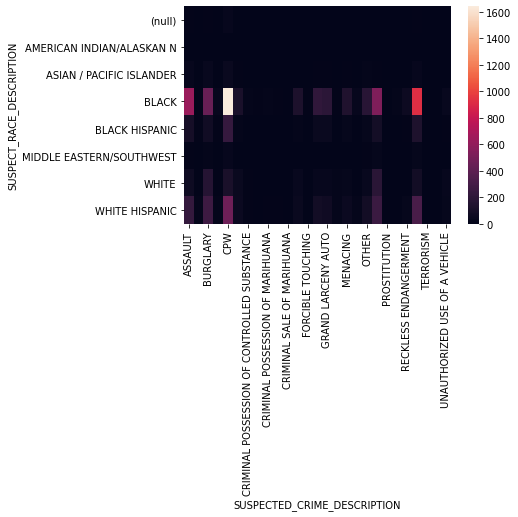

In [96]:
sns.heatmap(pd.crosstab(df["SUSPECT_RACE_DESCRIPTION"],df['SUSPECTED_CRIME_DESCRIPTION']))

Cleaned OG data set - fewer columns


In [80]:
df2 = pd.read_csv("sqf-2020-cleaned-corr copy 2.csv")

In [81]:
df2

,MONTH2,DAY2,STOP_WAS_INITIATED,OBSERVED_DURATION_MINUTES,SUSPECTED_CRIME_DESCRIPTION,STOP_DURATION_MINUTES,WEAPON_FOUND_FLAG,DEMEANOR_OF_PERSON_STOPPED,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,SUSPECT_HEIGHT,SUSPECT_WEIGHT,SUSPECT_EYE_COLOR,STOP_LOCATION_BORO_NAME
0,January,Wednesday,Based on Radio Run,1,CPW,2,Y,CALM,18,MALE,BLACK,6.1,160,BLK,MANHATTAN
1,January,Wednesday,Based on Radio Run,1,CPW,5,N,COMPLIANT,18,MALE,BLACK,6.2,180,BRO,MANHATTAN
2,January,Wednesday,Based on Radio Run,1,CPW,5,N,COMPLIANT,17,MALE,WHITE HISPANIC,5.1,165,BRO,MANHATTAN
3,January,Wednesday,Based on Radio Run,1,MENACING,10,N,COOPERATIVE,33,MALE,BLACK,6,220,BRO,BROOKLYN
4,January,Wednesday,Based on Radio Run,0,BURGLARY,15,N,UPSET,40,FEMALE,WHITE,5.9,170,BRO,BROOKLYN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,December,Thursday,Based on Radio Run,0,ASSAULT,10,N,CONFUSED,22,MALE,WHITE HISPANIC,5.5,180,BLK,BROOKLYN
9540,December,Tuesday,Based on Radio Run,1,CPSP,6,N,CALM,48,MALE,BLACK,6,200,BLK,BROOKLYN
9541,December,Saturday,Based on Self Initiated,1,CPW,2,Y,NaN,16,MALE,BLACK,5.8,150,BRO,BROOKLYN
9542,December,Friday,Based on Radio Run,0,PETIT LARCENY,5,N,UPSET,60,MALE,BLACK,6,170,ZZZ,BROOKLYN


In [83]:
df2['SUSPECT_SEX'].value_counts()

MALE      8642
FEMALE     855
(null)      47
Name: SUSPECT_SEX, dtype: int64

In [87]:
df2.groupby("STOP_LOCATION_BORO_NAME")['SUSPECT_RACE_DESCRIPTION'].value_counts()

STOP_LOCATION_BORO_NAME  SUSPECT_RACE_DESCRIPTION 
BRONX                    BLACK                        1124
                         WHITE HISPANIC                513
                         BLACK HISPANIC                326
                         WHITE                          47
                         (null)                         16
                         MIDDLE EASTERN/SOUTHWEST        9
                         ASIAN / PACIFIC ISLANDER        8
                         AMERICAN INDIAN/ALASKAN N       1
BROOKLYN                 BLACK                        1886
                         WHITE HISPANIC                490
                         WHITE                         291
                         BLACK HISPANIC                147
                         MIDDLE EASTERN/SOUTHWEST       58
                         ASIAN / PACIFIC ISLANDER       54
                         (null)                         17
                         AMERICAN INDIAN/ALASKAN N       7
MANHA

In [90]:
df2['SUSPECT_RACE_DESCRIPTION'].value_counts()

BLACK                        5367
WHITE HISPANIC               2050
WHITE                         856
BLACK HISPANIC                829
ASIAN / PACIFIC ISLANDER      219
MIDDLE EASTERN/SOUTHWEST      132
(null)                         74
AMERICAN INDIAN/ALASKAN N      17
Name: SUSPECT_RACE_DESCRIPTION, dtype: int64